# Lab 15: AVL Trees

## <font color=DarkRed>Your Exercise: Compare the performance of an unbalanced Binary Search Tree vs. a self-balancing AVL Tree</font>

Use the `BinarySearchTree`, `TreeNode`, `AVLTree`, and `AVLTreeNode` classes as found in our [class notebook on this topic](http://www.pas.rochester.edu/~rsarkis/csc162/_static/notebooks/14-Binary%20Search%20Trees/Binary%20Search%20and%20AVL%20Trees.ipynb).

The worst-case performance of both those structures is listed below.

| operation | Binary Search Tree |    AVL Tree__  |
| --------- | ------------------ | -------------- | 
| put 	    | $O(n)$             | $O(log_2 n)$   |
| get 	    | $O(n)$             | $O(log_2 n)$   |
| in 	    | $O(n)$             | $O(log_2 n)$   |
| del 	    | $O(n)$             | $O(log_2 n)$   |


**Your task:** Do your best to test the run time complexity of these operations on these two types of trees. This means:

   * Concoting some set of data to input into the trees (perhaps my previous word examples)
   
   * Using timer objects
   
   * Plots

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

In [1]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0
        
    def length(self):
        return self.size
    
    def __len__(self):
        return self.length()
    
    def __iter__(self):
        return self.root.__iter__()
    
    def put(self, key, val):
        if self.root:
            self._put(key, val, self.root)
        else:
            self.root = TreeNode(key, val)
            
        self.size += 1
        
    def _put(self, key, val, current_node):
        #print("Called from BinarySearchTree class")
        if key < current_node.key:        
            if current_node.has_left_child():
                self._put(key, val, current_node.left_child)
            else:
                current_node.left_child = TreeNode(key, val, parent=current_node)  # base case 
        else: # key is >= than current_node.key
            if current_node.has_right_child():
                self._put(key, val, current_node.right_child)
            else:
                current_node.right_child = TreeNode(key, val, parent=current_node)  # base case
                
    def __setitem__(self, k, v):
        self.put(k, v)
        
    def get(self, key):
        if self.root:
            res = self._get(key, self.root)
            if res:
                return res.payload
            else:
                return None
        else:
            return None
        
    def _get(self, key, current_node):
        if not current_node:
            return None
        elif current_node.key == key:
            return current_node
        elif key < current_node.key:
            return self._get(key, current_node.left_child)
        else:
            return self._get(key, current_node.right_child)
        
    def _getitem__(self, key):
        return self.get(key)
    
    
    def __contains__(self, key):
        if self._get(key, self.root):
            return True
        else:
            return False
        
        #return bool(self._get(key, self.root))
        #return True if self._get(key, self.root) else False
        
    def delete(self, key):
        if self.size > 1:
            node_to_remove = self._get(key, self.root)
            if node_to_remove:
                self.remove(node_to_remove)  # TODO: 'remove' needs to be defined!
                self.size -= 1
            else:
                raise KeyError('Key not in tree')
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size -=1
        else:
            raise KeyError('Key not in tree')
            
    def __delitem__(self, key):
        self.delete(key) 
    
    def remove(self, current_node):
        if current_node.is_leaf():  # leaf
            if current_node == current_node.parent.left_child:
                current_node.parent.left_child = None
            else:
                current_node.parent.right_child = None
        elif current_node.has_both_children():  # interior
            succ = current_node.find_successor()
            succ.splice_out()
            current_node.key = succ.key
            current_node.payload = succ.payload

        else:  # this node has one child
            if current_node.has_left_child():
                if current_node.is_left_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.left_child
                elif current_node.is_right_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.left_child
                else:
                    current_node.replace_node_data(current_node.left_child.key,
                                                   current_node.left_child.payload,
                                                   current_node.left_child.left_child,
                                                   current_node.left_child.right_child)
            else:
                if current_node.is_left_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.right_child
                elif current_node.is_right_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.right_child
                else:
                    current_node.replace_node_data(current_node.right_child.key,
                                                   current_node.right_child.payload,
                                                   current_node.right_child.left_child,
                                                   current_node.right_child.right_child)

In [2]:
class TreeNode:
    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key
        self.payload = val
        self.left_child = left
        self.right_child = right
        self.parent = parent
        
    def has_left_child(self):
        return self.left_child
    
    def has_right_child(self):
        return self.right_child
    
    def is_left_child(self):
        return self.parent and self.parent.left_child == self
    
    def is_right_child(self):
        return self.parent and self.parent.right_child == self

    def is_root(self):
        return not self.parent
    
    def is_leaf(self):
        return not (self.right_child or self.left_child)
    
    def has_any_children(self):
        return self.right_child or self.left_child
    
    def has_both_children(self):
        return self.right_child and self.left_child
        
    def replace_node_data(self, key, value, lc, rc):
        self.key = key
        self.payload = value
        self.left_child = lc
        self.right_child = rc
        
        if self.has_left_child():
            self.left_child.parent = self
            
        if self.has_right_child():
            self.right_child.parent = self
            
    def find_successor(self):
        succ = None
        if self.has_right_child():
            succ = self.right_child.find_min()
        else:
            if self.parent:
                if self.is_left_child():
                    succ = self.parent
                else:
                    self.parent.right_child = None
                    succ = self.parent.find_successor()
                    self.parent.right_child = self
                    
        return succ
            
    def find_min(self):
        current = self
        
        while current.has_left_child():
            current = current.left_child
            
        return current
    
    def splice_out(self):
        if self.is_leaf():
            if self.is_left_child():
                self.parent.left_child = None
            else:
                self.parent_right_child = None
        elif self.has_any_children():
            
            if self.has_left_child():
                if self.is_left_child():
                    self.parent.left_child = self.left_child
                else:
                    self.parent_right_child = self.left_child
                    
                self.left_child.parent = self.parent
            else:
                if self.is_left_child():
                    self.parent.left_child = self.right_child
                else:
                    self.parent.right_child = self.right_child
                    
                self.right_child.parent = self.parent   
    
    def __iter__(self):
        # inorder traversal of (sub-)tree
        # left children, root (self), right children
        if self:
            if self.has_left_child():
                for elem in self.left_child:
                    yield elem
                    
            yield self.key
            
            if self.has_right_child():
                for elem in self.right_child:
                    yield elem

In [3]:
class AVLTreeNode(TreeNode):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.balance_factor = 0 # For AVL Tree

In [4]:
class AVLTree(BinarySearchTree):
    def __init__(self):
        super().__init__() 
    
    def put(self, key, val):
        if self.root:
            self._put(key, val, self.root)
        else:
            self.root = AVLTreeNode(key, val)
            
        self.size += 1
        
    def _put(self, key, val, current_node):
        if key < current_node.key:
            if current_node.has_left_child():
                self._put(key,val,current_node.left_child)
            else:
                current_node.left_child = AVLTreeNode(key,val,parent=current_node)
                self.update_balance(current_node.left_child)
        elif key > current_node.key:
            if current_node.has_right_child():
                self._put(key,val,current_node.right_child)
            else:
                current_node.right_child = AVLTreeNode(key,val,parent=current_node)
                self.update_balance(current_node.right_child)

    def update_balance(self, node):
        if node.balance_factor > 1 or node.balance_factor < -1:
            self.rebalance(node)
            return
        
        if node.parent != None:
            if node.is_left_child():
                node.parent.balance_factor += 1
            elif node.is_right_child():
                node.parent.balance_factor -= 1

            if node.parent.balance_factor != 0:
                self.update_balance(node.parent)

    def rebalance(self, node):
        if node.balance_factor < 0:
            if node.right_child.balance_factor > 0:
                # Do an LR Rotation
                self.rotate_right(node.right_child)
                self.rotate_left(node)
            else:
                # single left
                self.rotate_left(node)
        elif node.balance_factor > 0:
            if node.left_child.balance_factor < 0:
                # Do an RL Rotation
                self.rotate_left(node.left_child)
                self.rotate_right(node)
            else:
                # single right
                self.rotate_right(node)

    def rotate_left(self,rot_root):
        new_root = rot_root.right_child
        rot_root.right_child = new_root.left_child
        
        if new_root.left_child != None:
            new_root.left_child.parent = rot_root
            
        new_root.parent = rot_root.parent
        
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_left_child():
                rot_root.parent.left_child = new_root
            else:
                rot_root.parent.right_child = new_root

        new_root.left_child = rot_root
        rot_root.parent = new_root
        rot_root.balance_factor = rot_root.balance_factor + 1 - min(new_root.balance_factor, 0)
        new_root.balance_factor = new_root.balance_factor + 1 + max(rot_root.balance_factor, 0)


    def rotate_right(self,rot_root):
        new_root = rot_root.left_child
        rot_root.left_child = new_root.right_child
        if new_root.right_child != None:
            new_root.right_child.parent = rot_root
        new_root.parent = rot_root.parent
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_right_child():
                rot_root.parent.right_child = new_root
            else:
                rot_root.parent.left_child = new_root
        new_root.right_child = rot_root
        rot_root.parent = new_root
        rot_root.balance_factor = rot_root.balance_factor - 1 - max(new_root.balance_factor, 0)
        new_root.balance_factor = new_root.balance_factor - 1 + min(rot_root.balance_factor, 0)

In [5]:
# Import libraries
import requests
import re
import sys
import time
import timeit
import matplotlib.pyplot as plt
sys.setrecursionlimit(5000)

In [6]:
req = requests.get("http://t2.hhg.to/ospd.txt")
words = req.text.split("\n")[0:3000]

In [7]:
# Generate different size of BST
for size in range(100,3100,100):
    words_tree = BinarySearchTree()
    for w in words[:size]:
        vars()['BST_'+str(size)] = words_tree
        words_tree.put(w, "No definition available")
    print('BinarySearchTree of size {} is done.'.format(size))

BinarySearchTree of size 100 is done.
BinarySearchTree of size 200 is done.
BinarySearchTree of size 300 is done.
BinarySearchTree of size 400 is done.
BinarySearchTree of size 500 is done.
BinarySearchTree of size 600 is done.
BinarySearchTree of size 700 is done.
BinarySearchTree of size 800 is done.
BinarySearchTree of size 900 is done.
BinarySearchTree of size 1000 is done.
BinarySearchTree of size 1100 is done.
BinarySearchTree of size 1200 is done.
BinarySearchTree of size 1300 is done.
BinarySearchTree of size 1400 is done.
BinarySearchTree of size 1500 is done.
BinarySearchTree of size 1600 is done.
BinarySearchTree of size 1700 is done.
BinarySearchTree of size 1800 is done.
BinarySearchTree of size 1900 is done.
BinarySearchTree of size 2000 is done.
BinarySearchTree of size 2100 is done.
BinarySearchTree of size 2200 is done.
BinarySearchTree of size 2300 is done.
BinarySearchTree of size 2400 is done.
BinarySearchTree of size 2500 is done.
BinarySearchTree of size 2600 is d

In [8]:
# Generate different size of BST
for size in range(100,3100,100):
    words_tree = AVLTree()
    for w in words[:size]:
        vars()['AVL_'+str(size)] = words_tree
        words_tree.put(w, "No definition available")
    print('AVL Tree of size {} is done.'.format(size))

AVL Tree of size 100 is done.
AVL Tree of size 200 is done.
AVL Tree of size 300 is done.
AVL Tree of size 400 is done.
AVL Tree of size 500 is done.
AVL Tree of size 600 is done.
AVL Tree of size 700 is done.
AVL Tree of size 800 is done.
AVL Tree of size 900 is done.
AVL Tree of size 1000 is done.
AVL Tree of size 1100 is done.
AVL Tree of size 1200 is done.
AVL Tree of size 1300 is done.
AVL Tree of size 1400 is done.
AVL Tree of size 1500 is done.
AVL Tree of size 1600 is done.
AVL Tree of size 1700 is done.
AVL Tree of size 1800 is done.
AVL Tree of size 1900 is done.
AVL Tree of size 2000 is done.
AVL Tree of size 2100 is done.
AVL Tree of size 2200 is done.
AVL Tree of size 2300 is done.
AVL Tree of size 2400 is done.
AVL Tree of size 2500 is done.
AVL Tree of size 2600 is done.
AVL Tree of size 2700 is done.
AVL Tree of size 2800 is done.
AVL Tree of size 2900 is done.
AVL Tree of size 3000 is done.


In [9]:
def isBST(name):
    if re.match(r'^BST_',name):
        return True
    else:
        return False

In [10]:
def isAVL(name):
    if re.match(r'^AVL_',name):
        return True
    else:
        return False

In [11]:
BSTNames = [var for var in list(vars().keys()) if isBST(var)]
BSTList = []
for name in BSTNames:
    BSTList.append(vars()[name])

In [12]:
AVLNames = [var for var in list(vars().keys()) if isAVL(var)]
AVLList = []
for name in AVLNames:
    AVLList.append(vars()[name])

## Comparison of `put` function runtime

In [13]:
sizes = [len(tree) for tree in BSTList]
BSTPut = []
AVLPut = []
for BST in BSTList:
    bt = timeit.Timer("BST.put('z','None')", globals={"BST": BST})
    BSTPut.append(bt.timeit(1))
for AVL in AVLList:
    at = timeit.Timer("AVL.put('z','None')", globals={"AVL": AVL})
    AVLPut.append(at.timeit(1))

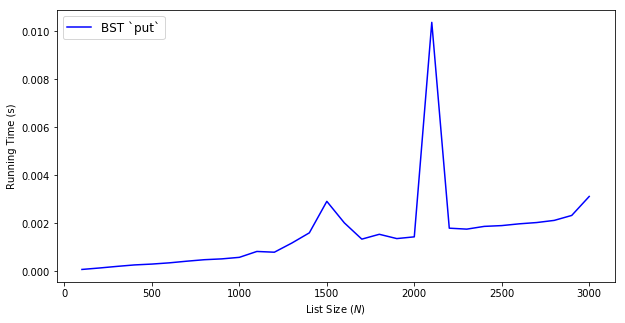

In [14]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, BSTPut, label='BST `put`', color='blue')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

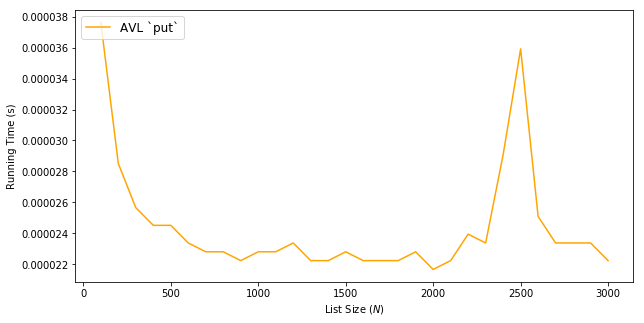

In [15]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, AVLPut, label='AVL `put`', color='orange')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

## Comparison of `get` function runtime

In [16]:
sizes = [len(tree) for tree in BSTList]
BSTGet = []
AVLGet = []
for BST in BSTList:
    lastword = words[len(BST)-2]
    bt = timeit.Timer("BST.get(lastword)", globals={"BST": BST, 'lastword': lastword})
    BSTGet.append(bt.timeit(100))
for AVL in AVLList:
    lastword = words[len(AVL)-2]
    at = timeit.Timer("AVL.get(lastword)", globals={"AVL": AVL, 'lastword': lastword})
    AVLGet.append(at.timeit(100))

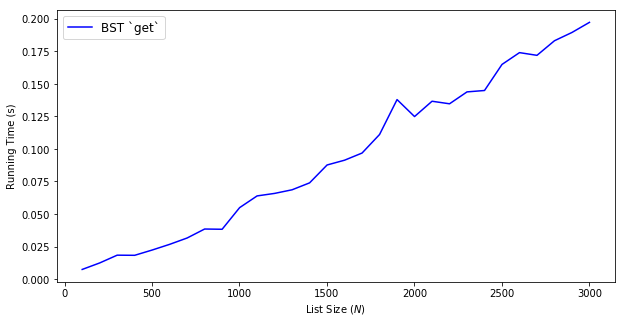

In [17]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, BSTGet, label='BST `get`', color='blue')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

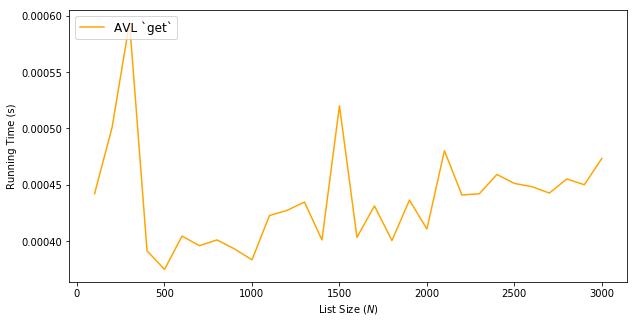

In [18]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, AVLGet, label='AVL `get`', color='orange')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

## Comparison of `in` function runtime

In [19]:
sizes = [len(tree) for tree in BSTList]
BSTIn = []
AVLIn = []
for BST in BSTList:
    lastword = words[len(BST)-2]
    bt = timeit.Timer("lastword in BST", globals={"BST": BST, 'lastword': lastword})
    BSTIn.append(bt.timeit(100))
for AVL in AVLList:
    lastword = words[len(AVL)-2]
    at = timeit.Timer("lastword in AVL", globals={"AVL": AVL, 'lastword': lastword})
    AVLIn.append(at.timeit(100))

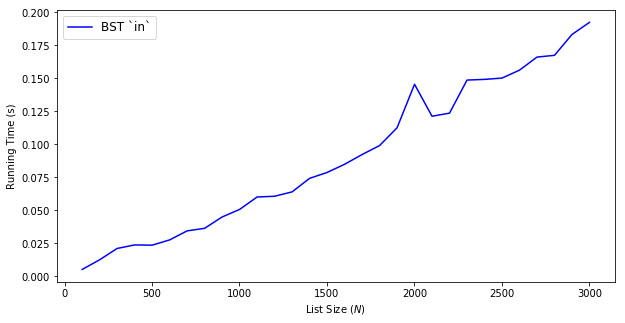

In [20]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, BSTIn, label='BST `in`', color='blue')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

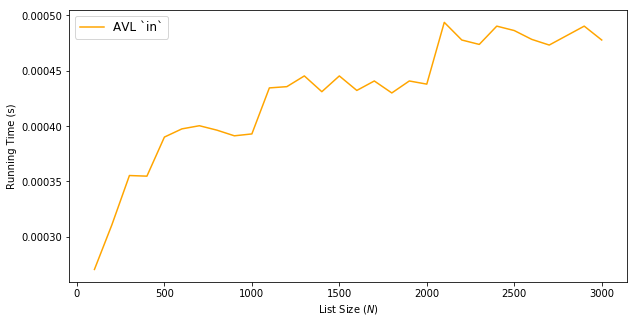

In [21]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, AVLIn, label='AVL `in`', color='orange')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

## Comparison of `del` function runtime

In [22]:
sizes = [len(tree) for tree in BSTList]
BSTDel = []
AVLDel = []
for BST in BSTList:
    lastword = words[len(BST)-2]
    bt = timeit.Timer("BST.delete(lastword)", globals={"BST": BST, 'lastword': lastword})
    BSTDel.append(bt.timeit(1))
for AVL in AVLList:
    lastword = words[len(AVL)-2]
    at = timeit.Timer("AVL.delete(lastword)", globals={"AVL": AVL, 'lastword': lastword})
    AVLDel.append(at.timeit(1))

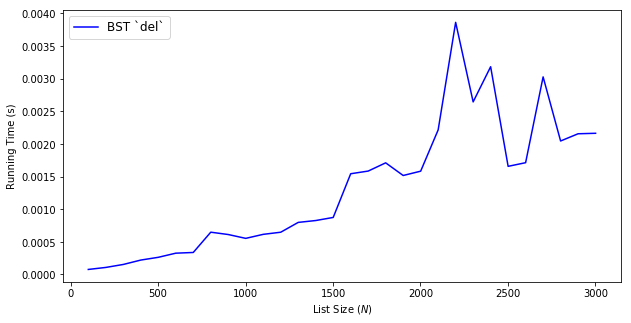

In [23]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, BSTDel, label='BST `del`', color='blue')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

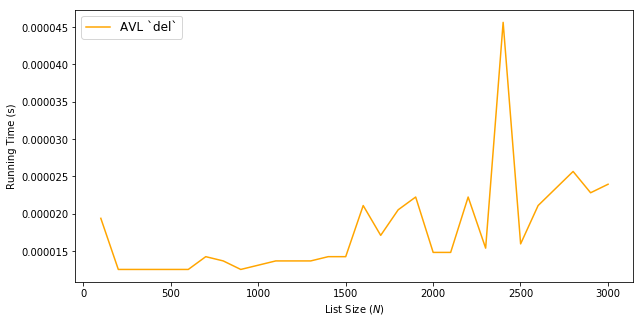

In [24]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(sizes, AVLDel, label='AVL `del`', color='orange')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()